## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de acuerdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

In [ ]:
#Cargamos la base de datos del Banco Mundial mediante Google Drive.

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive')

import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importamos la base de datos descargada desde el Banco Mundial para poder tenerla en nuestro GitHub.

import os
os.makedirs("/content/drive/MyDrive/portafolio/main", exist_ok=True)

ruta_csv = "/content/drive/MyDrive/portafolio/main/datos_banco_mundial.csv"
df_wb_raw.to_csv(ruta_csv, index=False)
print("Guardado en:", ruta_csv)

Guardado en: /content/drive/MyDrive/portafolio/main/datos_banco_mundial.csv


In [ ]:
# Instalamos wbgapi para acceder a la base de datos online.
!pip install wbgapi

import pandas as pd
import wbgapi as wb
import numpy as np
from math import ceil

# Definimos la funcion para descargar los datos de my_func.py
def descargar_en_chunks(indicadores, años, chunk_size=15):
    keys = list(indicadores.keys())
    n = len(keys)

    dfs = []

    for i in range(0, n, chunk_size):
        bloque = keys[i:i+chunk_size]
        print(f"Descargando bloque {i//chunk_size + 1}: {bloque}")

        df_temp = wb.data.DataFrame(
            series=bloque,
            time=años,
            columns='series' # Los indicadores son las columnas
        )
        dfs.append(df_temp)

    if not dfs:
        return pd.DataFrame()

    df_final = pd.concat(dfs, axis=1) # Concatenar todos los DataFrames.
    df_final = df_final.reset_index() # Resetea el index para obtener 'economy' y 'time' como columnas.

    # Renombrar columnas a nombres mas legibles y eficientes.
    df_final = df_final.rename(columns=indicadores)

    # Eliminamos la fila completa si el pais o año no tienen valor en PIB.
    df_final = df_final.dropna(subset=['PIB_PPP'])

    return df_final

# Prueba de validacion, se ve el correcto funcionamiento del proceso de descarga, limpieza y renombrado de variables en pequeño.
indicadores_para_estudio = {
    "NY.GDP.MKTP.PP.KD": "PIB_PPP",
    "SP.POP.TOTL": "Poblacion_Total",
    "SI.POV.GINI": "Indice_Gini"
}


# Descarga, limpia y une todo en un DataFrame.
df_estudio = descargar_en_chunks(indicadores_para_estudio, años=range(2020, 2024))

print("Descarga de datos exitosamente!")
print(df_estudio.head(10))

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.TOTL', 'SI.POV.GINI']
Descarga de datos exitosamente!
  economy    time       PIB_PPP  Indice_Gini  Poblacion_Total
0     ABW  YR2020  3.295359e+09          NaN         108587.0
1     ABW  YR2021  3.780786e+09          NaN         107700.0
2     ABW  YR2022  4.182926e+09          NaN         107310.0
3     ABW  YR2023  4.505296e+09          NaN         107359.0
4     AFE  YR2020  2.763153e+12          NaN      694446100.0
5     AFE  YR2021  2.892377e+12          NaN      713090928.0
6     AFE  YR2022  3.005226e+12          NaN      731821393.0
7     AFE  YR2023  3.065002e+12          NaN      750491370.0
8     AFG  YR2020  1.082088e+11          NaN       39068979.0
9     AFG  YR2021  8.576755e+10          NaN       40000412.0


Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.TOTL', 'SL.TLF.TOTL.IN', 'FP.CPI.TOTL.ZG', 'NE.EXP.GNFS.ZS', 'BX.KLT.DINV.WD.GD.ZS', 'GE.EST', 'SP.DYN.LE00.IN', 'IT.NET.USER.ZS', 'SE.PRM.NENR']

--- Revisión General del Dataset ---
Número de países: 199
Número de años: 35
Número de variables: 10
Total de observaciones: 6786

--- Porcentaje de datos faltantes por variable ---
Matricula_Primaria_Pct          55.776599
Efectividad_Gobierno            30.356617
Exportaciones_Pct_PIB           16.445623
Uso_Internet_Pct                15.369879
Inflacion_Pct                   12.584733
Fuerza_Laboral_Total             9.829060
Esperanza_Vida_Total             2.770410
Inversion_Extranjera_Pct_PIB     2.740937
economy                          0.000000
time                             0.000000
PIB_PPP                          0.000000
Poblacion_Total                  0.000000
dtype: float64

Variables eliminadas (>15% NA): ['Efectividad_Gobierno', 'Uso_Internet_Pct', 'Exportaciones_Pct_PI

/tmp/ipython-input-3660328105.py:99: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




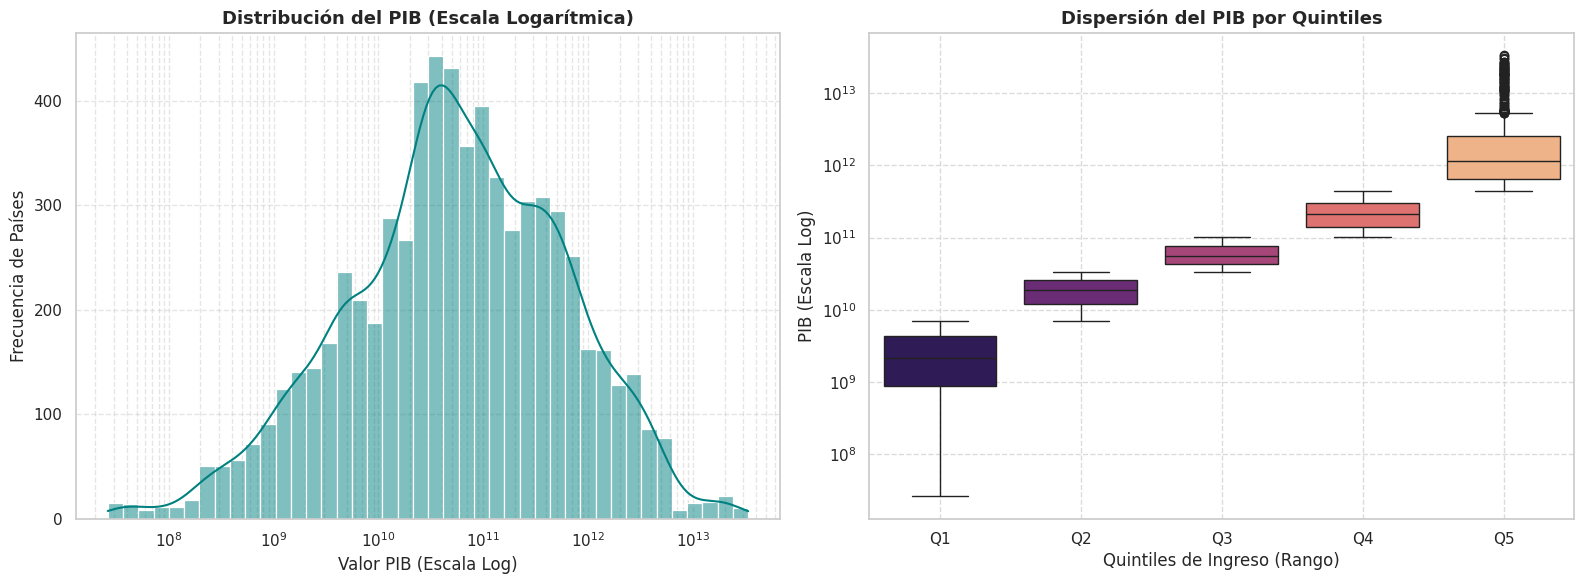

/tmp/ipython-input-3660328105.py:147: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




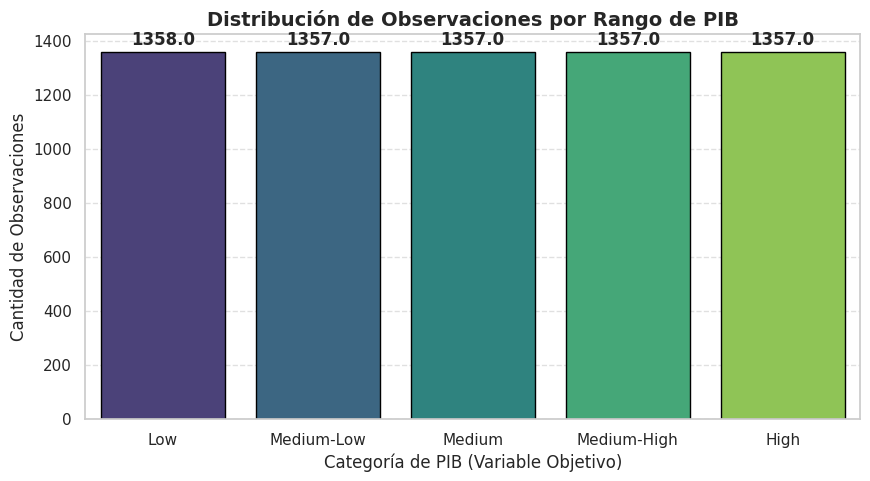


--- Distribución de Clases (Frecuencia Exacta) ---
PIB_CAT
Low            1358
Medium-Low     1357
Medium         1357
Medium-High    1357
High           1357
Name: count, dtype: int64


In [ ]:
## Etapa 1: Análisis descriptivo e imputación de datos

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Descarga de datos.
indicadores_estudio = {
    "NY.GDP.MKTP.PP.KD": "PIB_PPP",
    "SP.POP.TOTL": "Poblacion_Total",
    "SL.TLF.TOTL.IN": "Fuerza_Laboral_Total",
    "FP.CPI.TOTL.ZG": "Inflacion_Pct",
    "NE.EXP.GNFS.ZS": "Exportaciones_Pct_PIB",
    "BX.KLT.DINV.WD.GD.ZS": "Inversion_Extranjera_Pct_PIB",
    "GE.EST": "Efectividad_Gobierno",
    "SP.DYN.LE00.IN": "Esperanza_Vida_Total",
    "IT.NET.USER.ZS": "Uso_Internet_Pct",
    "SE.PRM.NENR": "Matricula_Primaria_Pct"
}

# Descargamos el rango completo (1990-2024) Elegimos estos años para una predicción optima, a pesar de que en clases solo se vio 2023. Relativamente buena cantidad de años y poca demora en cargar datos.
df_wb_raw = descargar_en_chunks(indicadores_estudio, años=range(1990, 2025))


## Filtrado de paises.

# Obtenemos la información de todas las economías
info_economias = wb.economy.info()

# Filtramos solo aquellas que no son agregados (países reales). Asi no mezclamos paises con regiones.
lista_solo_paises = [c['id'] for c in info_economias.items if c['aggregate'] == False]

# Aplicamos el filtro al DataFrame.
df_wb_raw = df_wb_raw[df_wb_raw['economy'].isin(lista_solo_paises)].reset_index(drop=True)

print(f"\n--- Revisión General del Dataset ---")
n_paises = df_wb_raw['economy'].nunique()
n_años = df_wb_raw['time'].nunique()
n_vars = len(df_wb_raw.columns) - 2 # Excluyendo economy y time
total_obs = len(df_wb_raw)

print(f"Número de países: {n_paises}")
print(f"Número de años: {n_años}")
print(f"Número de variables: {n_vars}")
print(f"Total de observaciones: {total_obs}")

## Análisis de falta de datos

missing_pct = df_wb_raw.isnull().mean() * 100
print("\n--- Porcentaje de datos faltantes por variable ---")
print(missing_pct.sort_values(ascending=False))

# Identificamos columnas > 15% , < 15%. Para eliminacion o imputacion.
cols_eliminar = missing_pct[missing_pct > 15].index.tolist()

# No eliminamos identificadores ni la variable objetivo.
for col in ['economy', 'time', 'PIB_PPP']:
    if col in cols_eliminar: cols_eliminar.remove(col)

df_etapa1 = df_wb_raw.drop(columns=cols_eliminar)
print(f"\nVariables eliminadas (>15% NA): {cols_eliminar}")

# Imputación con Mediana (para las variables que quedaron con < 15% NA)
cols_a_imputar = missing_pct[(missing_pct > 0) & (missing_pct <= 15)].index.tolist()
for col in cols_a_imputar:
    if col in df_etapa1.columns:
        df_etapa1[col] = df_etapa1[col].fillna(df_etapa1[col].median())

print(f"Variables imputadas con mediana: {cols_a_imputar}")


## Estadísticas descriptivas y análisis de rangos (outliers)

# Resumimos la distribución de las variables (tendencia central y dispersión) para contextualizar el comportamiento del dataset.

print("\n--- Tabla de Estadísticas Descriptivas ---")
stats = df_etapa1.drop(columns=['time']).describe().T
print(stats[['mean', '50%', 'std', 'min', 'max']].rename(columns={'50%': 'median'}))

# Configuramos visualualmente.

sns.set_theme(style="whitegrid")

# Figura con dos sub-gráficos para evaluar la distribución de la variable objetivo (PIB) e identificar posibles valores extremos.
# Se utiliza escala log porque el PIB suele presentar magnitudes muy diferentes entre países.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# A. Histograma con Escala Logarítmica (Evita la acumulación en valores bajos)
sns.histplot(df_etapa1['PIB_PPP'], kde=True, color='teal', log_scale=True, ax=ax1)
ax1.set_title('Distribución del PIB (Escala Logarítmica)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Valor PIB (Escala Log)')
ax1.set_ylabel('Frecuencia de Países')
ax1.grid(True, which="both", linestyle='--', alpha=0.5) # Cuadrícula de precisión

# B. Boxplot por Rangos (Para identificar outliers en cada nivel y comparar la dispersión por quintiles)
# Primero discretizamos temporalmente para el gráfico si no se ha hecho

temp_cat = pd.qcut(df_etapa1['PIB_PPP'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
sns.boxplot(x=temp_cat, y=df_etapa1['PIB_PPP'], palette='magma', ax=ax2)
ax2.set_yscale('log')
ax2.set_title('Dispersión del PIB por Quintiles', fontsize=13, fontweight='bold')
ax2.set_xlabel('Quintiles de Ingreso (Rango)')
ax2.set_ylabel('PIB (Escala Log)')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Mapa de distribución por categorías

# Visualizamos la heterogeneidad geográfica del nivel de PIB.
# Discretizamos primero para que el mapa muestre "Rangos" en lugar de un gradiente confuso
# Utilizamos el ultimo año para obtener un estado contemporaneo y evitar mezclas de periodos.
df_etapa1['PIB_CAT'] = pd.qcut(df_etapa1['PIB_PPP'],
                               q=5,
                               labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

ultimo_año = df_etapa1['time'].max()
df_mapa = df_etapa1[df_etapa1['time'] == ultimo_año]

# El mapa por categorías, nos da facilidad de interpretacion.
fig = px.choropleth(df_mapa,
                    locations="economy",
                    color="PIB_CAT", # Cambiamos a la variable categórica
                    hover_name="economy",
                    title=f"Mapa Global de Rangos de PIB - Año {ultimo_año}",
                    color_discrete_sequence=px.colors.qualitative.Safe,
                    category_orders={"PIB_CAT": ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']})

# Se agregaron parámetros para un mejor ajuste de layout.
fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    legend=dict(
        x=0.01,          # Posición horizontal
        y=0.5,           # Posición vertical
        xanchor='left'   # Anclaje de la leyenda a la izquierda
    )
)

fig.show()

## Análisis de balance de clases y cuadrícula

# Esto nos ayuda a balancear la etapa de clasificacion, ya que en caso de que existiecen desbalances se puede sesgar el entrenamiento y su evaluacion.

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_etapa1, x='PIB_CAT', palette='viridis', edgecolor='black')

# Añadir etiquetas de datos sobre las barras para análisis exacto.
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontweight='bold')

plt.title('Distribución de Observaciones por Rango de PIB', fontsize=14, fontweight='bold')
plt.xlabel('Categoría de PIB (Variable Objetivo)')
plt.ylabel('Cantidad de Observaciones')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

print("\n--- Distribución de Clases (Frecuencia Exacta) ---")
print(df_etapa1['PIB_CAT'].value_counts())


## **Interpretacion de Graficos**

# A. Distribución del PIB (escala logarítmica)

*   Se puede observar que la mayoria de los paises se concentra en valores meedios de PIB.
*   Existen paises con un PIB muy bajo o alto, pero en poca proporcion.
*   Hay alta heterogeneidad economica global porque hay presencia de economias gran tamaño.

# B. Dispersión del PIB por quintiles (boxplot)

*   Los quintiles inferiores Q1 y Q2 presentan poca dispersion y niveles de PIB homogeneos.
*   A medida que se avanza en los quintiles se aprecia una mayor dispersion Q4 y Q5.
*   El quintil mas alto Q5 concentra la mayor cantidad de outliers reflejando un gran poder de mercado de parte de pequeños paises, es decir, economias excepcionalmente grandes.

# C. Mapa global de rangos de PIB

*   Paises con altos rangos de PIB estan presentes principalmente en America del norte, Europa Occidental y algunas economias de Asia.
*   Rangos bajos y medio-bajo de PIB estan presentes en mayor parte en Africa, algunas partes de Asia y America Latina.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [ ]:
# indicadores a consultar
indicadores_wb_etapa2 = {
    "NY.GDP.MKTP.PP.KD": "PIB_PPP", # <--- Cambiado para evitar el KeyError
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [ ]:
# Descarga de datos
# Año 2023 puesto que esta completo y en clases se ocupo como ejemplo para el analisis.
df_etapa2 = descargar_en_chunks(indicadores_wb_etapa2, años=2023, chunk_size=10)

# Mostrar resultados
print("\n------- dataframe etapa2 -------")
df_etapa2.head()

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

,economy,PIB_PPP,Population growth (annual %),"Population, total","Population, female","Population, female (% of total population)","Population, male","Population, male (% of total population)",Urban population growth (annual %),Urban population,...,"School enrollment, tertiary, female (% gross)","School enrollment, tertiary, male (% gross)","Life expectancy at birth, female (years)","Life expectancy at birth, total (years)","Life expectancy at birth, male (years)","Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)","Individuals using the Internet, female (% of female population)","Individuals using the Internet, male (% of male population)",Individuals using the Internet (% of population)
0,ABW,4.505296e+09,0.045652,107359.0,56653.0,52.769620,50706.0,47.230380,-0.028616,66386.0,...,NaN,NaN,78.779000,76.353000,73.702000,NaN,NaN,NaN,NaN,NaN
1,AFE,3.065002e+12,2.519167,750491370.0,379019549.0,50.502852,371471821.0,49.497148,3.615164,283477860.0,...,NaN,NaN,67.914632,65.146154,62.395419,10.288154,41.289974,24.8,30.9,27.8000
2,AFG,8.223848e+10,2.135594,41454761.0,20530683.0,49.525513,20924078.0,50.474487,2.446706,10559793.0,...,NaN,NaN,67.536000,66.035000,64.467000,20.400000,87.000000,NaN,NaN,17.7089
3,AFW,2.992692e+12,2.386204,509398589.0,252899429.0,49.646669,256499160.0,50.353331,3.542791,266328396.0,...,NaN,NaN,59.997102,58.855722,57.752356,6.004144,45.206379,33.0,44.0,38.5000
4,AGO,3.229678e+11,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,25670362.0,...,9.933616,10.1656,67.144000,64.617000,62.099000,8.400000,75.000000,NaN,NaN,44.7581


VARIABLES NUMÉRICAS SELECCIONADAS PARA EL ANÁLISIS (61 en total):
1. Population growth (annual %)
2. Population, total
3. Population, female
4. Population, female (% of total population)
5. Population, male
6. Population, male (% of total population)
7. Urban population growth (annual %)
8. Urban population
9. Urban population (% of total population)
10. Labor force, female (% of total labor force)
11. Labor force, total
12. Unemployment, female (% of female labor force) (national estimate)
13. Unemployment, female (% of female labor force) (modeled ILO estimate)
14. Unemployment, male (% of male labor force) (national estimate)
15. Unemployment, male (% of male labor force) (modeled ILO estimate)
16. Unemployment, total (% of total labor force) (national estimate)
17. Rural population
18. Rural population growth (annual %)
19. Rural population (% of total population)
20. Inflation, consumer prices (annual %)
21. Taxes on exports (current LCU)
22. Taxes on exports (% of tax revenue)
23

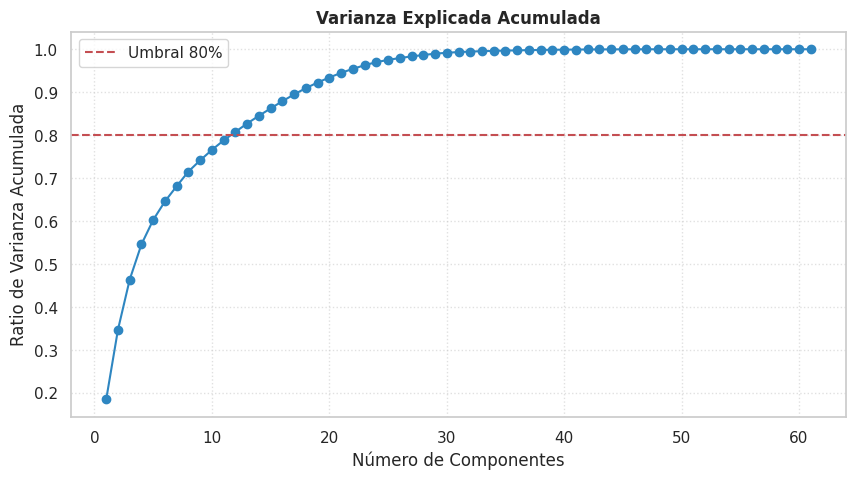


------------------------------------------------------------
JUSTIFICACIÓN DE LOS COMPONENTES SELECCIONADOS:
1. Criterio de Varianza: Se seleccionaron 12 componentes para explicar el
   80.76% de la varianza total (umbral del 80%).
2. Rango Óptimo: Esta elección cumple con el rango solicitado (70%-90%),
   asegurando que se retiene la estructura fundamental de los datos.
3. Eficiencia: Se reduce la dimensionalidad eliminando la redundancia y
   el ruido, optimizando el insumo para los modelos de clasificación.
------------------------------------------------------------

DECISIONES METODOLÓGICAS ADOPTADAS
1. Estandarización: Se aplicó StandardScaler (Media 0, Desviación 1) para
   equilibrar el peso de variables con escalas heterogéneas.
2. Reducción: Se seleccionaron 12 componentes principales.
3. Elección de Varianza: Se optó por un umbral del 80%.
4. Justificación: Esta elección permite simplificar el dataset eliminando
   la multicolinealidad, mientras se retiene la mayor parte de

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Target_PIB
0,0.382669,-1.670782,-0.404946,-0.257857,1.120411,-0.784556,0.241443,-0.513633,0.860030,-0.483949,0.613880,0.385703,Low
1,-2.786344,2.341164,0.586322,1.987272,-1.523391,0.899566,0.613553,0.314534,-2.238585,1.627706,1.252508,0.628392,Medium
2,-3.484738,3.308188,0.154930,1.155824,-1.458670,-0.501583,-0.423094,0.283977,2.510548,0.435389,0.318921,-0.735202,Medium-High
3,0.448956,-1.823208,0.160798,2.592355,1.469973,-1.550560,-0.894738,-0.725768,-0.940503,0.103520,-0.348415,0.112218,Medium-Low
4,1.680334,-3.020090,-0.363520,-0.842430,-0.931258,-0.330039,-0.612068,-0.372868,-0.052984,-0.597052,-0.154583,-0.112022,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,-2.298712,1.351666,-0.049282,-0.520248,0.439241,-1.984226,1.657767,-1.511158,-0.629394,-2.479236,-0.544767,3.235220,Low
194,0.716543,-2.007038,0.071494,2.162898,2.770503,-3.152786,1.332936,-0.298771,0.265155,1.008941,-0.946358,0.415829,Medium-Low
195,-1.629894,0.339915,2.012344,13.629022,-1.996106,0.798552,0.432580,-0.308513,0.191548,-2.184080,-1.466550,-0.325459,High
196,-2.837371,2.157332,-0.344232,-0.471467,0.320568,2.591171,0.533661,-0.045581,-0.518509,-0.301336,0.317008,-0.130740,Medium


In [ ]:
# --- ETAPA 2: REDUCCIÓN DE DIMENSIONALIDAD CON PCA ---
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. FILTRADO DE PAÍSES
economias = wb.economy.info()
iso_list = [item['id'] for item in economias.items if item['aggregate'] == False]
df_paises = df_etapa2[df_etapa2['economy'].isin(iso_list)].reset_index(drop=True)

# 2. DISCRETIZACIÓN DEL TARGET
df_paises['Target_PIB'] = pd.qcut(df_paises['PIB_PPP'], q=5,
                                 labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

# 3. SELECCIÓN NUMÉRICA Y LIMPIEZA
X_numeric = df_paises.select_dtypes(include=[np.number]).drop(columns=['PIB_PPP', 'time'], errors='ignore')

# Eliminamos columnas 100% nulas o con varianza cero (constantes)
X_numeric = X_numeric.dropna(axis=1, how='all')
X_numeric = X_numeric.loc[:, X_numeric.std() > 0]

# Variables seleccionadas
variables_finales = X_numeric.columns.tolist()
print("="*60)
print(f"VARIABLES NUMÉRICAS SELECCIONADAS PARA EL ANÁLISIS ({len(variables_finales)} en total):")
print("="*60)
for i, var in enumerate(variables_finales):
    print(f"{i+1}. {var}")

# Justificación de la selección
print("\n" + "-"*60)
print("JUSTIFICACIÓN DE LA SELECCIÓN DE VARIABLES:")
print("-"*60)
print("1. Tipo de Dato: Se filtraron exclusivamente variables numéricas (float/int),")
print("   requisito indispensable para el cálculo de la matriz de covarianza en PCA.")
print("2. Disponibilidad: Se eliminaron variables con 100% de valores nulos para el año")
print("   de estudio, evitando errores de cálculo en la etapa de estandarización.")
print("3. Relevancia Estadística: Se descartaron variables con varianza cero (constantes),")
print("   ya que no aportan información para distinguir patrones entre países.")
print("4. Independencia del Target: Se excluyó la variable 'PIB_PPP' para evitar el")
print("   sesgo de información (data leakage) en los modelos de clasificación.")
print("="*60 + "\n")

# 4. IMPUTACIÓN Y ESTANDARIZACIÓN
X_imputed = X_numeric.fillna(X_numeric.median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = np.nan_to_num(X_scaled)

# 5. APLICACIÓN DE PCA Y ANÁLISIS DE VARIANZA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# 6. GRÁFICO DE CODO (SCREE PLOT)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', color='#2E86C1')
plt.axhline(y=0.80, color='r', linestyle='--', label='Umbral 80%')
plt.title('Varianza Explicada Acumulada', fontweight='bold')
plt.xlabel('Número de Componentes')
plt.ylabel('Ratio de Varianza Acumulada')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

# 7. SELECCIÓN FINAL Y CONSTRUCCIÓN DEL DATAFRAME
n_comp = np.argmax(varianza_acumulada >= 0.80) + 1
pca_final = PCA(n_components=n_comp)

df_pca_final = pd.DataFrame(
    data=pca_final.fit_transform(X_scaled),
    columns=[f'PC{i+1}' for i in range(n_comp)]
)

df_pca_final['Target_PIB'] = df_paises['Target_PIB'].values

# Justificación de los componentes seleccionados
print("\n" + "-"*60)
print("JUSTIFICACIÓN DE LOS COMPONENTES SELECCIONADOS:")
print("="*50)
print(f"1. Criterio de Varianza: Se seleccionaron {n_comp} componentes para explicar el")
print(f"   {varianza_acumulada[n_comp-1]:.2%} de la varianza total (umbral del 80%).")
print("2. Rango Óptimo: Esta elección cumple con el rango solicitado (70%-90%),")
print("   asegurando que se retiene la estructura fundamental de los datos.")
print("3. Eficiencia: Se reduce la dimensionalidad eliminando la redundancia y")
print("   el ruido, optimizando el insumo para los modelos de clasificación.")
print("-" * 60)

# 8. RESUMEN FINAL Y JUSTIFICACIÓN METODOLÓGICA
print(f"\n" + "="*50)
print("DECISIONES METODOLÓGICAS ADOPTADAS")
print("="*50)
print(f"1. Estandarización: Se aplicó StandardScaler (Media 0, Desviación 1) para")
print(f"   equilibrar el peso de variables con escalas heterogéneas.")
print(f"2. Reducción: Se seleccionaron {n_comp} componentes principales.")
print(f"3. Elección de Varianza: Se optó por un umbral del 80%.")
print(f"4. Justificación: Esta elección permite simplificar el dataset eliminando")
print(f"   la multicolinealidad, mientras se retiene la mayor parte de la")
print(f"   variabilidad económica necesaria para clasificar el nivel de PIB.")
print("="*50)

print("-"*50)
print("="*50)
print("DATAFRAME FINAL")
print("="*50)


df_pca_final

### **Conclusion**

Se preservo la mayor informacion posible reduciendo la dimensionalidad de indicadores economicos, sociales y deeomograficos provenientes de una base de datos del Banco Mundial Online.
La estandarizacion mediante StandardScaler nos permitio homogenizar las escalas, condicion para que PCA capture patrones estructurales y no diferencias de magnitudes.
El analisis de varianza explicada acumulada mostro que pocos componentes son capaces de explicar significativamente una parte de la variabilidad total del dataset. Nos disminuyo la multicolinealidad, nos redujo el ruido y mejora la eficiencia logaritmica de clasificacion.


In [1]:
# Definición de los conjuntos de datos

# Variables originales (estandarizadas en Etapa 2)
X_original = x_std.copy()

# Variables reducidas (PCA, Etapa 2)
X_pca = df_pca.copy()

# Variable objetivo (PIB discretizado)
y_target = y.copy()

# Preparación y partición de los datos

#Los datos se dividen en conjuntos de entrenamiento y prueba utilizando una partición estratificada, con la idea de mantener la
#distribución de clases en ambos subconjuntos. Se eliminan previamente clases con frecuencia insuficiente para garantizar una partición válida.

from sklearn.model_selection import train_test_split

# Alinear índices
common_idx = X_original.index.intersection(y_target.index)
X_original = X_original.loc[common_idx]
X_pca = X_pca.loc[common_idx]
y_target = y_target.loc[common_idx].dropna()

# Eliminar clases con menos de 2 observaciones
vc = y_target.value_counts()
valid_classes = vc[vc >= 2].index
mask = y_target.isin(valid_classes)

X_original = X_original.loc[mask]
X_pca = X_pca.loc[mask]
y_target = y_target.loc[mask]

# Partición train / test
train_idx, test_idx = train_test_split(
    X_original.index,
    test_size=0.30,
    random_state=42,
    stratify=y_target
)

Xo_train, Xo_test = X_original.loc[train_idx], X_original.loc[test_idx]
Xp_train, Xp_test = X_pca.loc[train_idx], X_pca.loc[test_idx]
y_train, y_test = y_target.loc[train_idx], y_target.loc[test_idx]

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Modelos de clasificación

#Se implementan dos modelos con distintos niveles de complejidad.
#Regresión Logística, como modelo lineal e interpretable. Random Forest, como modelo no lineal capaz de capturar interacciones complejas.

models = {
    "Regresión Logística": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42)
}


NameError: name 'x_std' is not defined